<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: Approximation
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.optimize

import numerics.change_fonts
numerics.change_fonts.change_fontsize()

## Load and plot test data

The test data set are **beach lines** from Richmond Gulf, an area along the shores of Hudson Bay in Canada.

We load the data set with the `csv` package:

In [2]:
csvfile = open('data/fit_richmondgulf.in', newline='')
beachlines = csv.reader(csvfile)
next(beachlines)
i=0
tobs=np.array([])
terr=np.array([])
hobs=np.array([])
herr=np.array([])
for row in beachlines:
    #print (row[0].split())
    tobs = np.append(tobs,float(row[0].split()[0]))
    terr = np.append(terr,float(row[0].split()[1]))
    hobs = np.append(hobs,float(row[0].split()[2]))
    herr = np.append(herr,float(row[0].split()[3]))
    i=i+1

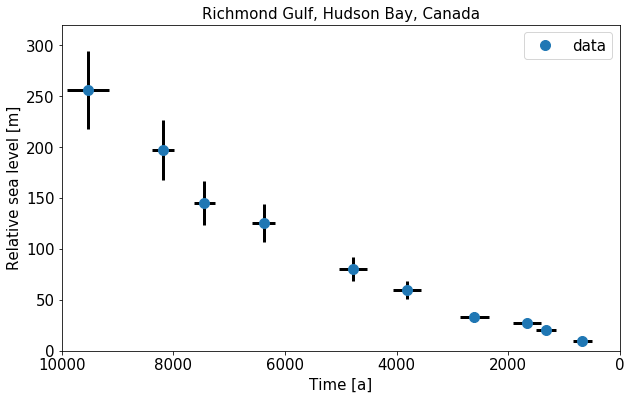

In [3]:
plt.figure(figsize=(10,6))
plt.title('Richmond Gulf, Hudson Bay, Canada')
plt.xlim([10000,0])
plt.ylim([0,320])
plt.xlabel('Time [a]')
plt.ylabel('Relative sea level [m]')
plt.errorbar(tobs,hobs,xerr=terr,yerr=herr,linewidth=0,elinewidth=3,ecolor='black')
plt.plot(tobs,hobs,linewidth=0,marker='o',markersize=10,label='data')
plt.legend()

----
## Linear fit

Text ...

In [4]:
def fit_linear(x,y,yerr):
    n = len(x)
    # define weights
    s = 0.
    sx = 0.
    sy = 0.
    sxx = 0.
    sxy = 0.
    for i in range(n):
        s   = s + 1 / yerr[i]**2
        sx  = sx + x[i] / yerr[i]**2
        sy  = sy + y[i] / yerr[i]**2
        sxx = sxx + x[i]**2 / yerr[i]**2
        sxy = sxy + x[i]*y[i] / yerr[i]**2
    delta = s*sxx - sx**2
    # determine coefficients and uncertainties
    a     = (sxx*sy-sx*sxy) / delta
    b     = (s*sxy-sx*sy) / delta
    siga  = sxx / delta
    sigb  = s / delta
    
    # regression and chi2 value
    r     = -sx/np.sqrt(s*sxx)
    chi2  = 0.
    for i in range(n):
        chi2  = chi2 + ((y[i]-a-b*x[i])**2 / yerr[i]**2)
    
    return a,b,r,chi2

In [5]:
a,b,r,chi2 = fit_linear(tobs,hobs,herr)

In [6]:
print (a,b,r,chi2)

-3.2006200316801694 0.018212806469593012 -0.760662408500989 15.201210907202292


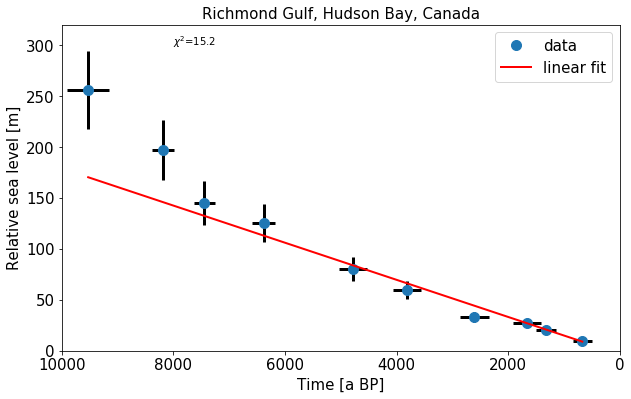

In [7]:
plt.figure(figsize=(10,6))
plt.title('Richmond Gulf, Hudson Bay, Canada')
plt.xlim([10000,0])
plt.ylim([0,320])
plt.xlabel('Time [a BP]')
plt.ylabel('Relative sea level [m]')
plt.errorbar(tobs,hobs,xerr=terr,yerr=herr,linewidth=0,elinewidth=3,ecolor='black')
plt.plot(tobs,hobs,linewidth=0,marker='o',markersize=10,label='data')
plt.plot(tobs,a+b*tobs,linewidth=2,color='red',label='linear fit')
plt.text(8000.,300.,'$\chi^2$='+str(round(chi2,2)))
plt.legend()

----
[next>](Numerics_lab08_linear_functions.ipynb)